# Physics 512 -  Problem Set 4

Kit M. Gerodias

In [3]:
import numpy as np
from matplotlib import pyplot as plt


# Problem No. 1

In [11]:
#code based from lecture notes

def gaussian(x, sig = 1.5):
    #Gaussian Function
    return np.exp(-0.5*x**2/(sig**2))

def shiftFunc(x, dx):
    #Gaussian Func
    #y = np.exp(-0.5*x**2/(1.5**2))
    N = x.size
    J = np.complex(0,1)
    kvec = np.arange(N)
    
    #first function FFT
    yft_f = np.fft.fft(y)
    #second function FFT
    yft_g = np.exp(-2*np.pi*J*kvec*dx/N)
    
    yft_new = yft_f*yft_g
    y_shifted = np.real(np.fft.ifft(yft_new))
    
    return y_shifted


In [12]:
x = np.arange(-10,10,0.1)
y = gaussian(x)
dx = len(x)/2 #half array length

y_shifted = shiftFunc(y,dx)

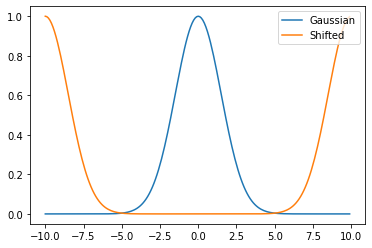

In [20]:
#plotting
plt.plot(x,y,label = 'Gaussian')
plt.plot(x,y_shifted, label = 'Shifted')
plt.legend(loc = 1)
plt.show()

# Problem No. 2

In [14]:

def correlateFunc(f,g):
    
    fft_f = np.fft.fft(f)
    fft_g = np.fft.fft(g)
    conj_gft = np.conjugate(fft_g)
    #correlate
    corr_func = np.real(np.fft.ifft(fft_f*conj_gft))
    
    return corr_func

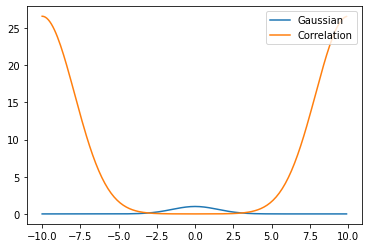

In [22]:
corr_func = correlateFunc(y,y)

#plotting
plt.plot(x,y,label = 'Gaussian')
plt.plot(x,corr_func, label = 'Correlation')
plt.legend(loc = 1)
plt.show()

# Problem No. 3

Scaled Correlation


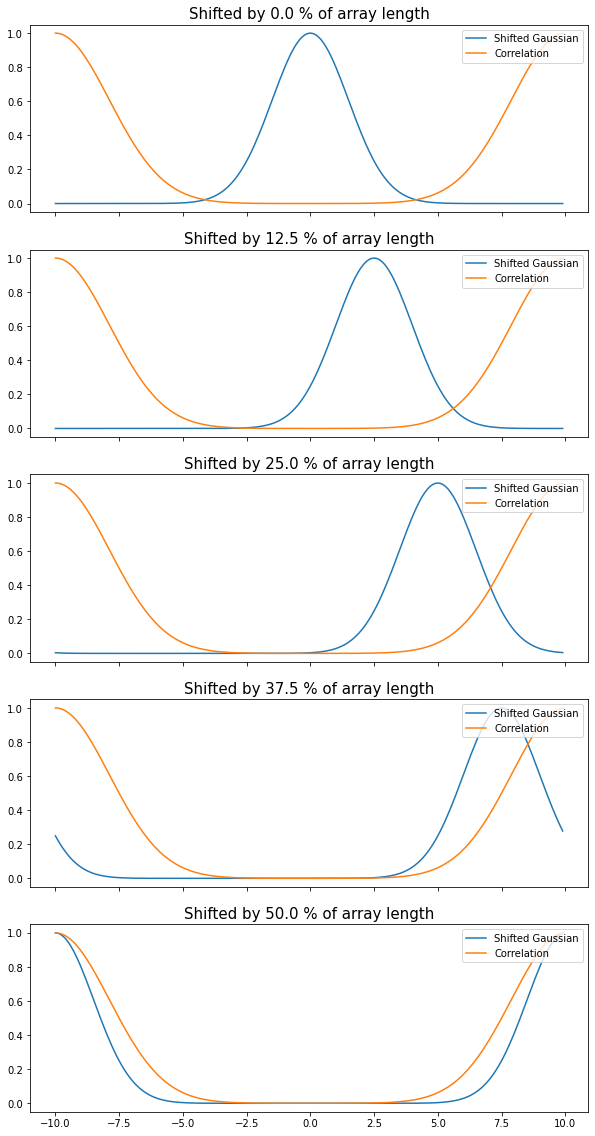

In [150]:
dx = np.asarray([0, 25, 50, 75, 100])
y_shift = []
y_corr = []
cnt=0
fig, axs = plt.subplots(len(dx), figsize=(10,20),sharex=True)
for i in dx:
    y_shift= np.asarray(shiftFunc(y,i))
    y_corr_unscaled = correlateFunc(y_shift,y_shift)
    #scaling correlated function
    y_corr = y_corr_unscaled/max(y_corr_unscaled)
    
    axs[cnt].plot(x,y_shift, label = 'Shifted Gaussian')
    axs[cnt].plot(x,y_corr,label = 'Correlation')
    axs[cnt].set_title("Shifted by {} % of array length".format(i*100/len(x)), fontsize = 15, loc='center')
    axs[cnt].legend(loc=1)
    cnt+=1
print("Scaled Correlation")
plt.show()

The graph of the correlation function (orange curve) did not change as the Gaussian was shifted. At first it surprised me but this is a correlation of the Gaussian function with it self, taking the convolution must have given the same result.

# Problem No. 4

In [255]:
def convolve(f,g, pad = True):
    
    lenf = len(f)
    if pad:
        f=np.pad(f,[0,len(f)], mode = 'constant')
        g=np.pad(g,[0,len(g)], mode = 'constant')

    conv = np.fft.irfft(np.fft.rfft(g)*np.fft.rfft(f))

    if pad:
        conv = conv[:lenf]

        
    return conv


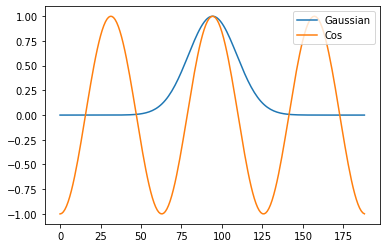

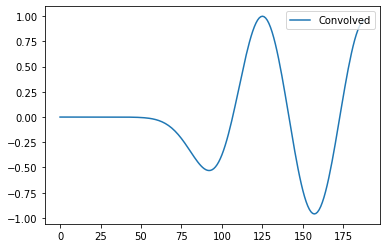

In [256]:
xx = np.arange(-3*np.pi,3*np.pi,0.1)
yy1 = gaussian(xx) #np.sin(xx)
yy2 = np.cos(xx)

#Convolve
conv_func_pad = convolve(yy1, yy2, True)

#plotting
plt.plot(yy1,label = 'Gaussian')
plt.plot(yy2,label = 'Cos')
plt.legend(loc = 1)
plt.show()

plt.plot(conv_func_pad/max(conv_func_pad), label = 'Convolved')
plt.legend(loc = 1)
plt.show()

# Problem No. 5

##### (a)

From https://mathworld.wolfram.com/GeometricSeries.html, the geometric series is defined as, 
$$ \sum_{k=0}^{n} r^{k} = \frac {1 - r^{n+1}}{1 - r} .$$

Comparing this definition to DFT's, we get
$r = e^{-i 2\pi k /N} , n = N - 1, k = x$. Thus,

$$  \sum_{x=0}^{N-1} e^{-i 2\pi kx /N} = \frac {1 - e^{(-i 2\pi k /N)(N-1+1)}}{1 - e^{-i 2\pi k /N}} = \frac {1 - e^{-i 2\pi k}
}{1 - e^{-i 2\pi k /N}} .$$

##### (b)
Looking at the left-hand side of the equation, as $k \to 0$, $ e^{-i 2\pi k /N} \to 1$. The summation for indices $x = 0$ to $x = N -1$ is simply summing one N times. Thus, as $k \to 0$, the sum approaches N.

Euler's formula: $e^{ix} = \cos{x} + i \sin{x}$. \
So $ e^{-i 2\pi k} = \cos{(-2\pi k)} + i sin{(-2\pi k)} = \cos{(2\pi k)} - i sin{(2\pi k)}$. This means that for any integral k  in the right-hand side, the numerator is zero. And so the expression equals zero. However, this is only valid when k is not a multiple of N since this will result to zero denominator




##### (c)

Sine wave: $ f(x) = sin(\frac {2 \pi K x}{N }) = \frac {e^{\frac {i2 \pi K x}{N }} - e^{\frac {-i2 \pi K x}{N }} }{2i}$

 and $K$ represents the non-integer $k$

$$  \sum_{x=0}^{N-1} f(x) e^{-i 2\pi kx /N} = \sum_{x=0}^{N-1}  \frac {e^{{i2 \pi K x}/{N }} - e^{{-i2 \pi K x}/{N }} }{2i} e^{-i 2\pi kx /N}$$

$$ = \sum_{x=0}^{N-1} \frac {e^{{i2 \pi K x}/{N }} e^{-i 2\pi kx /N} - e^{{-i2 \pi K x}/{N }} e^{-i 2\pi kx /N} }{2i} $$

$$ = \sum_{x=0}^{N-1} \frac {e^{{i2 \pi K x}/{N } {-i 2\pi kx /N} }  - e^{{-i2 \pi K x}/{N } {-i 2\pi kx /N}}  }{2i} $$

$$ = \frac {1}{2i} \sum_{x=0}^{N-1} {e^{{i2 \pi (K-k) x}/{N } }  - e^{{-i2 \pi (K+k) x}/{N } }  } $$

Using the result in 5a,

$$ = \frac {1}{2i}  \biggl( \frac {1 - e^{-i 2\pi (K-k)}}{1 - e^{-i 2\pi (K-k) /N}} - \frac {1 - e^{-i 2\pi (K+k)}}{1 - e^{-i 2\pi (K+k) /N}} \biggr) $$

In [257]:
#basing from lecture notes

def dftSineFunc(N,K):
    pi = np.pi
    J = np.complex(0,1)
    kvec = np.arange(N)
    
    num = 1 - np.exp(-J*2*pi*(K - kvec))
    dem = 1 - np.exp(-J*2*pi*(K - kvec)/N)
    
    minuend = num/dem
    
    num = 1 - np.exp(-J*2*pi*(K + kvec))
    dem = 1 - np.exp(-J*2*pi*(K + kvec)/N)
    
    subtrahend = num/dem
    
    diff = (minuend - subtrahend)/(2*J)
    
    return diff
    

Error between analytic DFT and FFT: 0.434


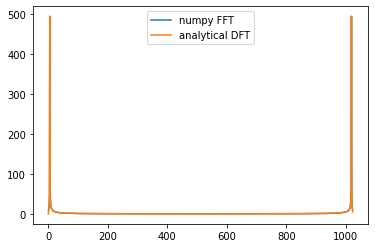

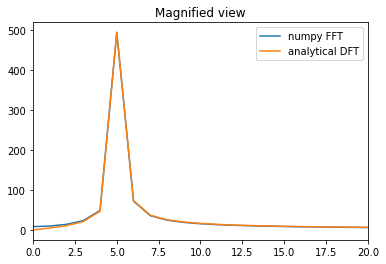

In [292]:
#basing from lecture notes

N = 1024
x = np.arange(N)
K = 5.12 #non-integer k

#function
sine_wave = np.sin(2*np.pi*x*K/N)

#FFT
fft_func = np.abs(np.fft.fft(sine_wave))

#Analytical DFT
analytical_dft = np.abs(dftSineFunc(N,K))

#Error
err = np.std(analytical_dft - fft_func)
print("Error between analytic DFT and FFT:",round(err,3))

#plotting
plt.plot(fft_func, label='numpy FFT')
plt.plot(analytical_dft, label='analytical DFT')
plt.legend()
plt.show()

plt.plot(fft_func, label='numpy FFT')
plt.plot(analytical_dft, label='analytical DFT')
plt.title("Magnified view")
plt.legend()
plt.xlim(0,20)
plt.show()


##### (d)
window: $0.5 - 0.5 \cos (2 \pi x / N)$


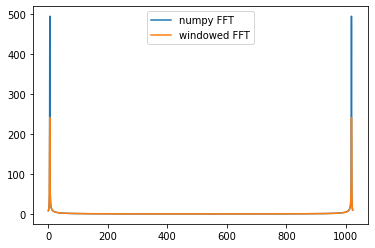

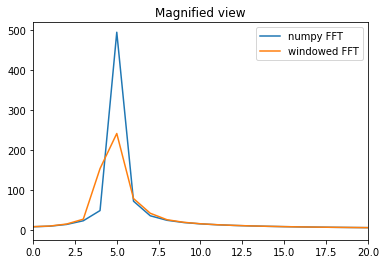

In [293]:
#window, the same from lecture notes

window = 0.5*(1 + np.cos(2*np.pi*x/N))

win_fft = np.abs(np.fft.fft(sine_wave*window))

#plotting
plt.plot(fft_func, label='numpy FFT')
plt.plot(win_fft, label='windowed FFT')
plt.legend()
plt.show()

plt.plot(fft_func, label='numpy FFT')
plt.plot(win_fft, label='windowed FFT')
plt.title("Magnified view")
plt.legend()
plt.xlim(0,20)
plt.show()

Spectral leakage dropped by about a factor of 2.

##### (e)